### Added 10% of duplicates 

In [1]:
import sys
import os 
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

import duplicates_utils, sanity_checks_methods
import pandas as pd
import ML_algorithms
from sklearn.metrics import classification_report

# Return to previous directory
os.chdir('..')

df = pd.read_csv('dataset/stroke_data.csv')

no_stroke_group = df[df['stroke'] == 0]
stroke_group = df[df['stroke'] == 1]

group_size = 5000

sampled_no_stroke_group = no_stroke_group.sample(n=group_size, random_state=42)
sampled_stroke_group = stroke_group.sample(n=group_size, random_state=42)

df = pd.concat([sampled_no_stroke_group,sampled_stroke_group])

df = sanity_checks_methods.clean_dataset(df)
df_clean = df.copy()

## Adding duplicates

In [2]:
print('--------------------------------------')
duplicates_utils.print_duplicates_values(df) 

print(f'\nADDING 10% TO FEATURE \n')

df = duplicates_utils.replace_duplicates_values(df, 10)
duplicates_utils.print_duplicates_values(df)

--------------------------------------
Number of rows:  9363
Duplicate Counts:  0
Percentage of Duplicate Values:  0.0

ADDING 10% TO FEATURE 

Number of rows:  9363
Duplicate Counts:  936
Percentage of Duplicate Values:  9.9967958987504


## Decision Tree

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.92      0.81      0.86      1434
           1       0.82      0.92      0.87      1375

    accuracy                           0.86      2809
   macro avg       0.87      0.87      0.86      2809
weighted avg       0.87      0.86      0.86      2809

Node Labels:
 Annotation(0.642808, 0.954545, 'avg_glucose_level <= 167.36\nsamples = 6554\nvalue = [3290, 3264]\nclass = 0')


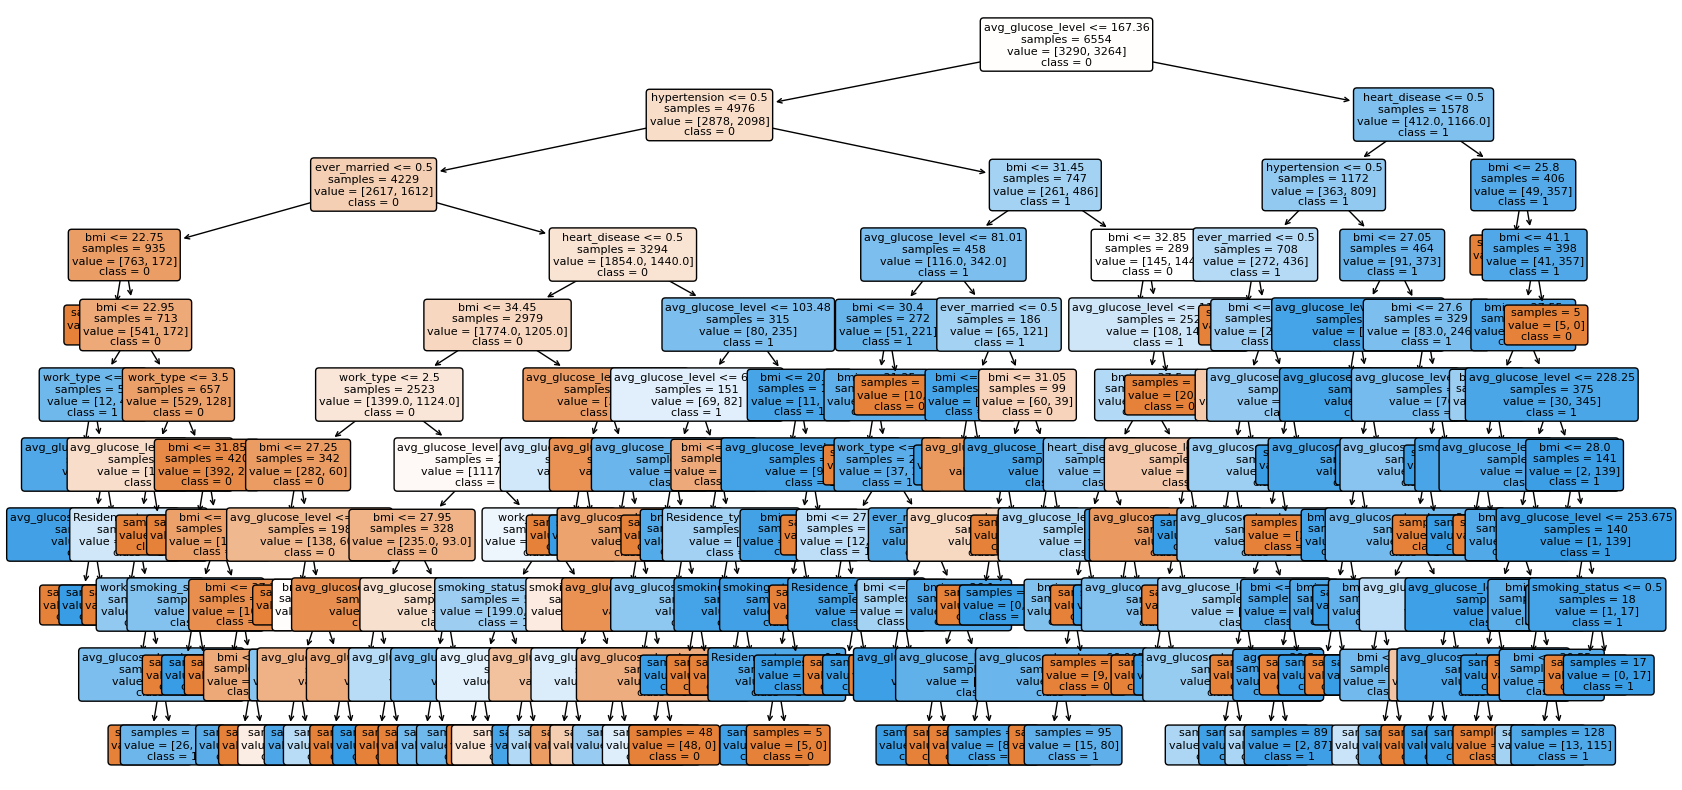

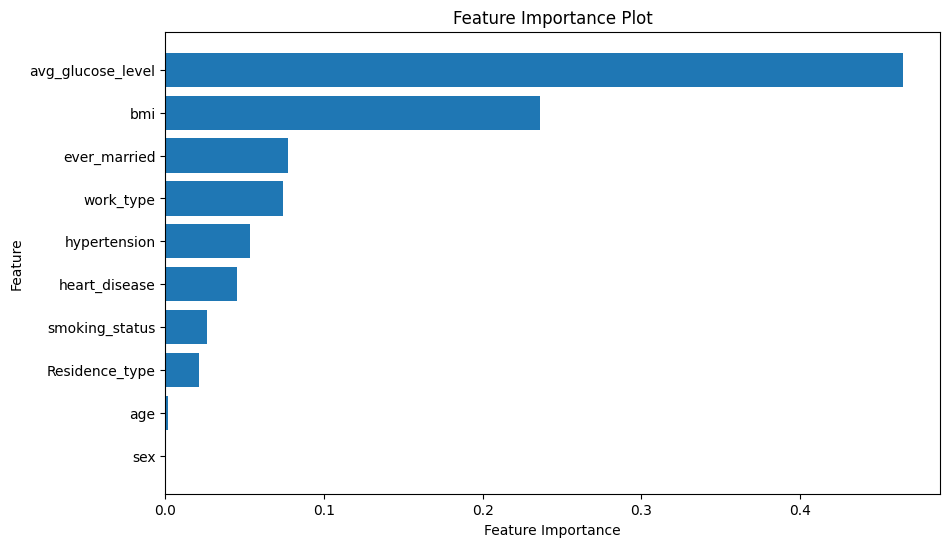

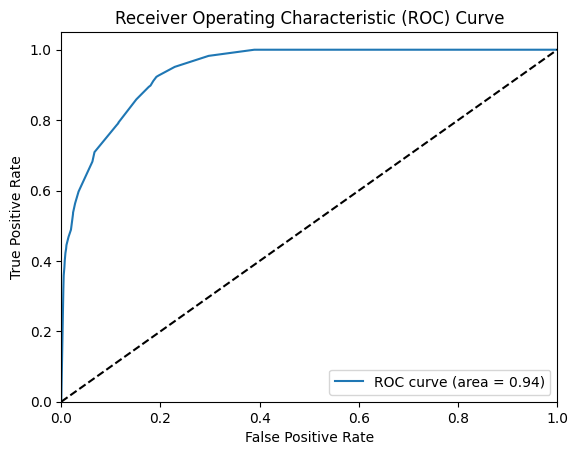

AUC Score: 0.9414968936224166


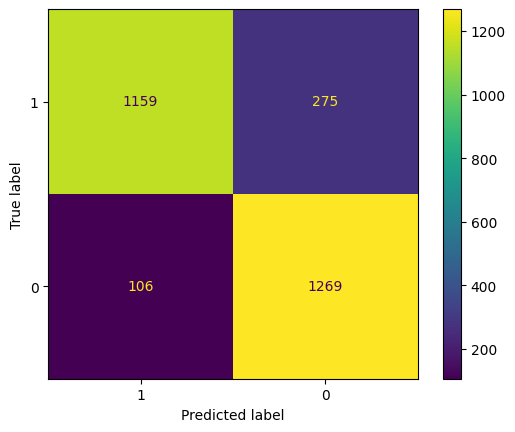

Accuracy for each fold: [0.8612099644128114, 0.8113879003558719, 0.8256227758007118, 0.8291814946619217, 0.8149466192170819, 0.8505338078291815, 0.8185053380782918, 0.7473309608540926, 0.7900355871886121, 0.8]
Mean accuracy: 0.8148754448398577
95% confidence interval: (0.7920481061927678, 0.8377027834869477)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


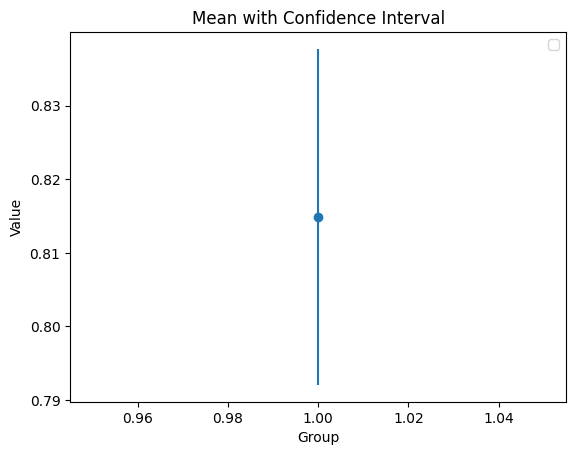

In [3]:
y_pred_prob, y_test_dt, classification_report_dt, decision_tree = ML_algorithms.model_dt(df, df_clean)
ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_clean)

## Support Vector Machine

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters found: {'classifier__C': 100, 'classifier__gamma': 1}
Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.95      0.89      0.92      1434
           1       0.89      0.95      0.92      1375

    accuracy                           0.92      2809
   macro avg       0.92      0.92      0.92      2809
weighted avg       0.92      0.92      0.92      2809



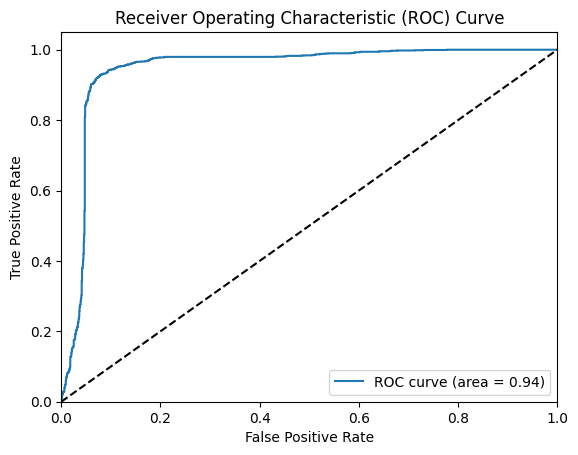

AUC Score: 0.9448109547356408


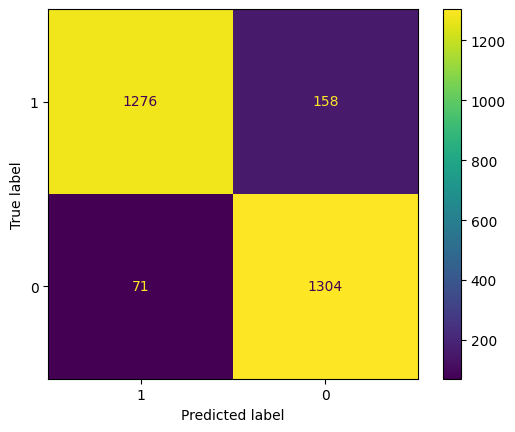

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.7829181494661922, 0.7758007117437722, 0.7686832740213523, 0.7864768683274022, 0.8042704626334519, 0.7829181494661922, 0.7864768683274022, 0.797153024911032, 0.7153024911032029, 0.775]
Mean accuracy: 0.7775000000000001
95% confidence interval: (0.760176177807711, 0.7948238221922892)


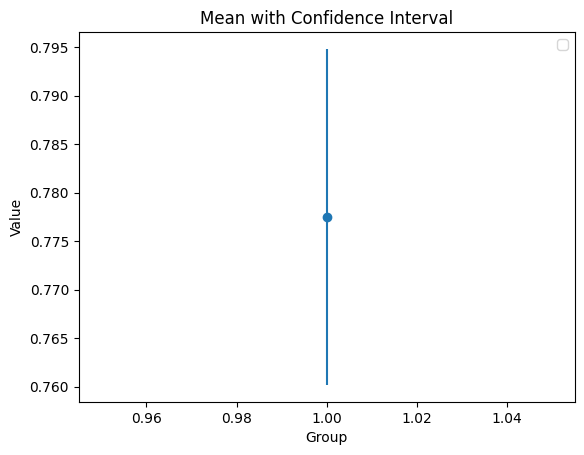

--------------------------------------


In [4]:
y_pred_prob_svm, y_test_svm, classification_report_svm, svm = ML_algorithms.model_svm(df, df_clean)
ML_algorithms.k_fold_cross_validation_dt(svm,df_clean)

print('--------------------------------------')

## Conclusion

## ROC Curve

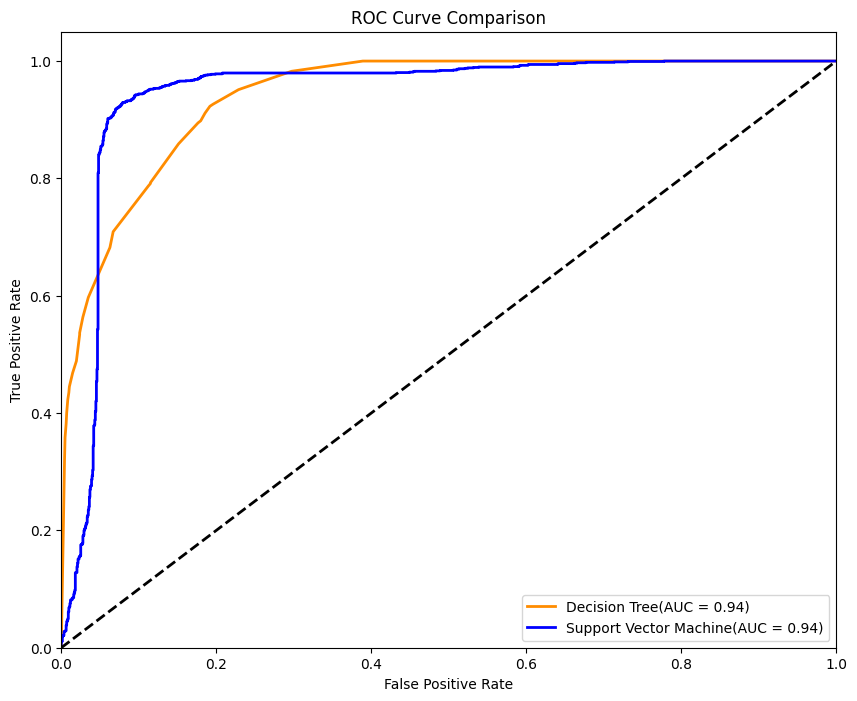

In [5]:
ML_algorithms.plot_roc_curve_conlusion(y_pred_prob, y_test_dt, y_pred_prob_svm, y_test_svm)

### CLassification Report

In [6]:
print('Classification report - Decision Tree')
print(classification_report_dt)
print('Classification report - Support Vector Machine')
print(classification_report_svm)

Classification report - Decision Tree
              precision    recall  f1-score   support

           0       0.92      0.81      0.86      1434
           1       0.82      0.92      0.87      1375

    accuracy                           0.86      2809
   macro avg       0.87      0.87      0.86      2809
weighted avg       0.87      0.86      0.86      2809

Classification report - Support Vector Machine
              precision    recall  f1-score   support

           0       0.95      0.89      0.92      1434
           1       0.89      0.95      0.92      1375

    accuracy                           0.92      2809
   macro avg       0.92      0.92      0.92      2809
weighted avg       0.92      0.92      0.92      2809

